In [370]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':16})

In [362]:
data = np.loadtxt("../data/recombination.txt")
data_saha = np.loadtxt("../data/recombination_saha.txt")

x     = data[:,0]
Xe    = data[:,1]
ne    = data[:,2]
tau   = data[:,3]
dtau  = data[:,4]
ddtau = data[:,5]
g     = data[:,6]
dg    = data[:,7]
ddg   = data[:,8]

Xe_saha = data_saha[:,1]
ne_saha = data_saha[:,2]

saha_idx = np.argmin(np.abs(Xe - 0.99))  # Index of end of Saha domain, and begining of Peebles, at Xe = 0.99.
rec_idx  = np.argmin(np.abs(Xe - 0.5))  # Index of defined recombination point, at Xe = 0.5.
rec_saha_idx  = np.argmin(np.abs(Xe_saha - 0.5))  # The above, but using only the Saha approximation.
LS_idx   = np.argmin(np.abs(tau - 1.0))  # Index of defined last scattering surface, at tau=1.0.

x[saha_idx], x[rec_saha_idx], x[rec_idx], x[LS_idx]

(-7.37067, -7.23035, -7.16507, -6.98619)

Text(0.5, 0, 'x')

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


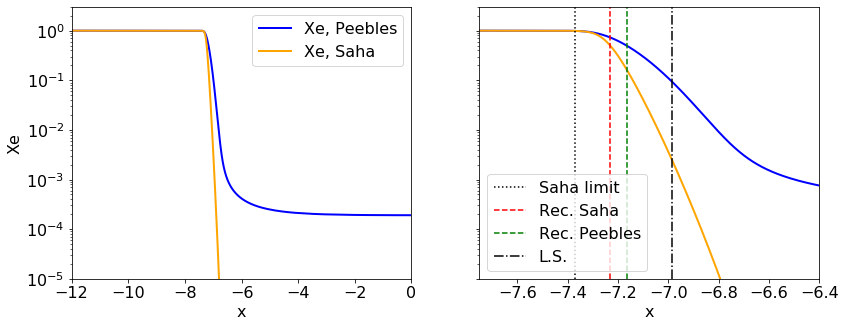

In [398]:
fig, ax = plt.subplots(1, 2, figsize=(13.4, 5), sharey=True)
ax[0].semilogy(x, Xe, c="blue", label="Xe, Peebles", lw=2)
ax[0].semilogy(x, Xe_saha, c="orange", label="Xe, Saha", lw=2)
ax[0].set_ylim(1e-5, 3)
ax[0].set_xlim(-12, 0)
ax[0].legend()
ax[0].set_xlabel("x")
ax[0].set_ylabel("Xe")

ax[1].semilogy(x, Xe, c="blue", lw=2)
ax[1].semilogy(x, Xe_saha, c="orange", lw=2)
ax[1].axvline(x=x[saha_idx], ls=":", c="k", label="Saha limit")
ax[1].axvline(x=x[rec_saha_idx], ls="--", c="r", label="Rec. Saha")
ax[1].axvline(x=x[rec_idx], ls="--", c="g", label="Rec. Peebles")
ax[1].axvline(x=x[LS_idx], ls="-.", c="k", label="L.S.")
ax[1].legend()
ax[1].set_ylim(1e-5, 3)
ax[1].set_xlim(-7.75, -6.4);
ax[1].set_xlabel("x")
# fig.tight_layout()
# fig.savefig("../m2_figs/Xe.pdf", bbox_inches="tight")
# plt.close(fig)

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


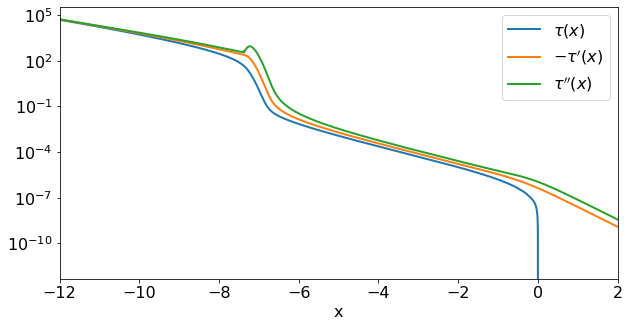

In [399]:
plt.figure(figsize=(10, 5))
plt.semilogy(x, tau, label=r"$\tau(x)$", lw=2)
plt.semilogy(x, -dtau, label=r"$-\tau'(x)$", lw=2)
plt.semilogy(x, ddtau, label=r"$\tau''(x)$", lw=2)
plt.legend()
plt.xlabel("x")
plt.xlim(-12, 2);

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


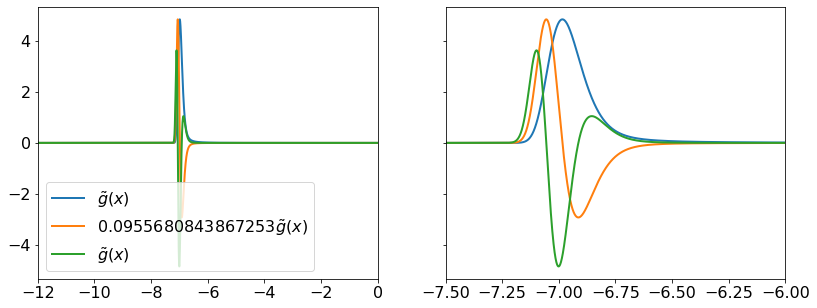

In [417]:
dg_scale = np.max(g)/np.max(np.abs(dg)); dg_scaled = dg*dg_scale
ddg_scale = np.max(g)/np.max(np.abs(ddg)); ddg_scaled = ddg*ddg_scale

fig, ax = plt.subplots(1, 2, figsize=(13.4, 5), sharey=True)
ax[0].plot(x, g, lw=2, label=r"$\tilde{g}(x)$")
ax[0].plot(x, dg_scaled, lw=2, label = str(dg_scale) + r"$\tilde{g}(x)$")
ax[0].plot(x, ddg_scaled, lw=2, label=r"$\tilde{g}(x)$")
ax[0].set_xlim(-12, 0)
ax[0].legend()

ax[1].plot(x, g, lw=2)
ax[1].plot(x, dg_scaled, lw=2)
ax[1].plot(x, ddg_scaled, lw=2)
ax[1].set_xlim(-7.5, -6);

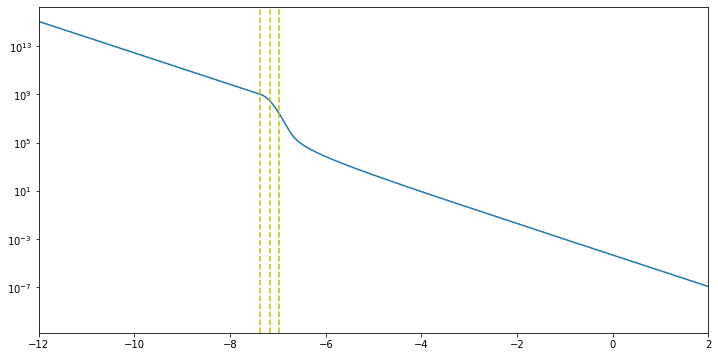

In [326]:
plt.figure(figsize=(12,6))
plt.semilogy(x, ne)
plt.axvline(x=x[saha_idx], ls="--", c="y")
plt.axvline(x=x[rec_idx], ls="--", c="y")
plt.axvline(x=x[LS_idx], ls="--", c="y")
plt.xlim(-12, 2);